In [ ]:
import pytc
%matplotlib inline

# libraries for making pretty sliders
from IPython.html import widgets
from IPython.html.widgets import interactive
from IPython.display import display


/home/harmsm/Desktop/pytc/pytc/models/single_site.py:57: RuntimeWarning: invalid value encountered in sqrt
  ST = (b - np.sqrt((b)**2 - 4*S_conc_corr*self._T_conc))/2


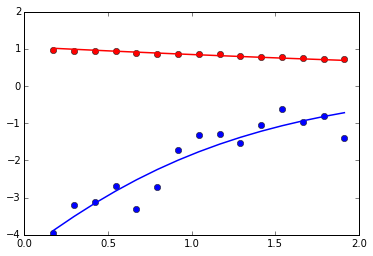

In [41]:
### BASIC EXPERIMENTAL TEMPLATE, WITH HACKED TOGETHER GUI ####

class Interface:
    
    def __init__(self,fitter):
        """
        """
        
        self._global_sliders = {}
        self._local_sliders = []
        self._fitter = fitter
        self._experiments = [] 
    
    def add_experiment(self,expt):
        
        self._fitter.add_experiment(expt)
        self._experiments.append(expt)
        
    
    def build_interface(self):
        """
        """
    
        global_param, local_param = self._fitter.param_names
        global_guesses, local_guesses = self._fitter.param_guesses
        global_ranges, local_ranges = self._fitter.param_ranges
        global_fixed, local_fixed = self._fitter.fixed_param 
        
        all_widgets = {}
        for p in global_param:
        
            g_min = global_ranges[p][0]
            g_max = global_ranges[p][1]
            g_val = global_guesses[p]
            
            self._global_sliders[p] = widgets.FloatSlider(min=g_min,max=g_max,value=g_val)
            
            all_widgets["{}".format(p)] = self._global_sliders[p]
    
        for i in range(len(self._experiments)):            
            
            self._local_sliders.append({})
        
            for p in local_param[i]:
            
                g_min = local_ranges[i][p][0]
                g_max = local_ranges[i][p][1]
                g_val = local_guesses[i][p]
                
                self._local_sliders[-1][p] = widgets.FloatSlider(min=g_min,max=g_max,value=g_val)
        
                all_widgets["{},{}".format(p,i)] = self._local_sliders[-1][p]
            
        w = widgets.interactive(self._update,**all_widgets)
                        
        display(w)
        
        btn = widgets.Button(description="Show Fit")
        btn.on_click(self.get_param)
        display(btn)

    def _update(self,**kwargs):
        """
        """
        
        for k in kwargs.keys():
            if len(k.split(",")) == 1:
                self._fitter.update_guess(k,kwargs[k])
            else:
                
                param_name = k.split(",")[0]
                expt = self._experiments[int(k.split(",")[1])]
                self._fitter.update_guess(param_name,kwargs[k],expt)
       
        self._fitter.fit()
        self._fitter.plot()
        
    def get_param(self):
        
        print(self._fitter.fit_param)

    
        
        
        
g = pytc.GlobalFit()
X = Interface(g)

e1 = pytc.ITCExperiment("test-data/blank.DH",pytc.models.Blank)
e2 = pytc.ITCExperiment("test-data/real-blank-match.DH",pytc.models.SingleSite)

X.add_experiment(e1)
X.add_experiment(e2)    



g.link_to_global(e1,"dilution_heat","global_heat")
g.link_to_global(e2,"dilution_heat","global_heat")

g.link_to_global(e1,"dilution_intercept","global_intercept")
g.link_to_global(e2,"dilution_intercept","global_intercept")

X.build_interface()




In [38]:

#### COMMAND LINE API DEMO ####

g = pytc.GlobalFit()

e1 = pytc.ITCExperiment("test-data/blank.DH",pytc.models.Blank)
e2 = pytc.ITCExperiment("test-data/real-blank-match.DH",pytc.models.SingleSite)

print("Add two experiments, no global parameters")

g.add_experiment(e1)
g.add_experiment(e2)    

print(g.param_names)
print(g._global_param_alias_mapping)
print("-------------------------------------")

#--------------------------------------------------------------------------

print("Create a global parameter X for dilution_heat")

g.link_to_global(e1,"dilution_heat","X")
g.link_to_global(e2,"dilution_heat","X")

print(g.param_names)
print(g._global_param_alias_mapping)
print("-------------------------------------")

#--------------------------------------------------------------------------

print("Create a global parameter Y for dilution_intercept")

g.link_to_global(e1,"dilution_intercept","Y")
g.link_to_global(e2,"dilution_intercept","Y")

print(g.param_names)
print(g._global_param_alias_mapping)
print("-------------------------------------")

#--------------------------------------------------------------------------

print("Remove global parameter X, using each experiment")

g.unlink_from_global(e1,"dilution_heat","X")
g.unlink_from_global(e2,"dilution_heat","X")

print(g.param_names)
print(g._global_param_alias_mapping)
print("-------------------------------------")

#--------------------------------------------------------------------------

print("Remove global parameter Y totally")

g.remove_global("Y")

print(g.param_names)
print(g._global_param_alias_mapping)
print("-------------------------------------")

#--------------------------------------------------------------------------

print("Create new global variables")

g.link_to_global(e1,"dilution_heat","m")
g.link_to_global(e2,"dilution_heat","m")
g.link_to_global(e1,"dilution_intercept","b")
g.link_to_global(e2,"dilution_intercept","b")

print(g.param_names)
print(g._global_param_alias_mapping)
print("-------------------------------------")

#--------------------------------------------------------------------------

print("Do global fit")

g.fit()
print(g.fit_param)

print("-------------------------------------")

#--------------------------------------------------------------------------

print("remove the first experiment")

g.remove_experiment(e1)

print(g.param_names)
print(g._global_param_alias_mapping)


Add two experiments, no global parameters
([], [['dilution_heat', 'dilution_intercept'], ['K', 'dH', 'dilution_heat', 'dilution_intercept', 'fx_competent']])
{}
-------------------------------------
Create a global parameter X for dilution_heat
(['X'], [['dilution_intercept'], ['K', 'dH', 'dilution_intercept', 'fx_competent']])
{'X': [('zlCZEVlUgetaeASzewtE', 'dilution_heat'), ('NLlRWVIaujuEPiBIZDwV', 'dilution_heat')]}
-------------------------------------
Create a global parameter Y for dilution_intercept
(['X', 'Y'], [[], ['K', 'dH', 'fx_competent']])
{'Y': [('zlCZEVlUgetaeASzewtE', 'dilution_intercept'), ('NLlRWVIaujuEPiBIZDwV', 'dilution_intercept')], 'X': [('zlCZEVlUgetaeASzewtE', 'dilution_heat'), ('NLlRWVIaujuEPiBIZDwV', 'dilution_heat')]}
-------------------------------------
Remove global parameter X, using each experiment
(['Y'], [['dilution_heat'], ['K', 'dH', 'dilution_heat', 'fx_competent']])
{'Y': [('zlCZEVlUgetaeASzewtE', 'dilution_intercept'), ('NLlRWVIaujuEPiBIZDwV', 

/home/harmsm/Desktop/pytc/pytc/models/single_site.py:57: RuntimeWarning: invalid value encountered in sqrt
  ST = (b - np.sqrt((b)**2 - 4*S_conc_corr*self._T_conc))/2
